<a href="https://colab.research.google.com/github/Ruvindya/Machine-Learning/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LAB 03 2019E117

##1. Study the dataset ’Fashion-MNIST’ in Keras. Answer the following questions in relation to the above dataset.

(a) Find out whether it can be used for regression or classification.

*   It is used fot classification.

(b) What is the size of the images?

*   image is a 28 x 28 size grayscale image

(c) How many images are there in the train data?

*   The fashion MNIST dataset consists of 60,000 images for the training set data


(d) State the number of images in test data.

*  10,000 images for the testing set.

(e) How many classes are there in the data? Write down those classes.

* T-shirt/top
* Trouser
* Pullover
* Dress
* Coat
* Sandal
* Shirt
* Sneaker
* Bag
* Ankle boot

##2. Load that dataset directly from Keras using Python.

In [58]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

##3. View some images in training data, for example draw the 11th image in your training data.

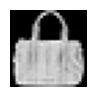

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))
plt.imshow(train_images[4000], cmap='gray')
plt.axis('off')

plt.show()

##4. Normalize your data (train and test) between 0 and 1.
Hint: This is a grayscale image has pixel values between 0 and 255.

In [60]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# zi = (xi – min(x)) / (max(x) – min(x))
# train_images = (train_images - 0)/(255 - 0)
# train_images = train_images/ 255

# This improves the performance and training stability of the model.
# This is required only when features have different ranges.

##5. Now divide the training data into two: 
Validation images (first 5000 images from the initial training data) and Training images (rest of the images in your initial training data).

In [61]:
val_images = train_images[:5000]
val_labels = train_labels[:5000]
train_images = train_images[5000:]
train_labels = train_labels[5000:]

# data splitting is typically done to avoid overfitting


##6. Initialize the weight and bias parameters of your model.


In [62]:
weight_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
bias_init = keras.initializers.Zeros()

# Weight initialization is used to define the initial values for the parameters in neural network models prior to training the models
# without bias weights, your model would have very limited movement when looking for a solution

##7. Now build the neural network model with the following characteristics:
(a) One Flatten layer as the input layer.
(b) Two dense relu layers as hidden layers.
(c) A dense softmax layer as the output layer


In [63]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu', kernel_initializer=weight_init, bias_initializer=bias_init),
    keras.layers.Dense(128, activation='relu', kernel_initializer=weight_init, bias_initializer=bias_init),
    keras.layers.Dense(10, activation='softmax')
])

# Flatten is the function that converts the pooled feature map to a single column that is passed to the fully connected layer. Dense adds the fully connected layer to the neural network

##8. Answer the following questions.
(a) What is the use of Flatten layer?

* By using flatten layer, can map the input images int 2D layer which is single column. Then it can compatible with dense layer

(b) Generally, softmax activation function is used in the output layer of the classification networks. Why?

* The softmax activation function is commonly used in the output layer to normalizes the output probabilities across classes. Then it is suitable for multi-class classification. Those decimal probabilities must add up to 1.0

##9. Print the summary of the network

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


##10. Now compile the model with the desired loss function, optimizer and metrics.

In [65]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

##11. Now train your model on the training data and validate your model.

In [66]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))


Epoch 1/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5027 - accuracy: 0.8163 - val_loss: 0.4184 - val_accuracy: 0.8398
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3686 - accuracy: 0.8639 - val_loss: 0.3673 - val_accuracy: 0.8696
Epoch 3/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3327 - accuracy: 0.8766 - val_loss: 0.3302 - val_accuracy: 0.8772
Epoch 4/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3079 - accuracy: 0.8852 - val_loss: 0.3192 - val_accuracy: 0.8836
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2877 - accuracy: 0.8941 - val_loss: 0.3239 - val_accuracy: 0.8822
Epoch 6/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2737 - accuracy: 0.8974 - val_loss: 0.3016 - val_accuracy: 0.8942
Epoch 7/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2631 - accuracy: 0.9016 - val_loss: 0.2972 - val_ac

##12. Evaluate your model on the test data. What is the accuracy of your model on the test data?

In [67]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accuracy on test data:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3424 - accuracy: 0.8859
Accuracy on test data: 0.8859000205993652


##13. Now take the first five samples of test data. Print the actual target classes and the predicted target classes of those five samples

In [68]:
# Predict the target classes for the first five samples of the test data
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
predictions = model.predict(test_images[:5])
predicted_classes = [class_labels[prediction.argmax()] for prediction in predictions]
actual_classes = [class_labels[label] for label in test_labels[:5]]

1/1 [==============================] - 0s 91ms/step


In [69]:
# Print the actual and predicted target classes
for i in range(5):
    print("Actual:", actual_classes[i], "Predicted:", predicted_classes[i])

Actual: Ankle boot Predicted: Ankle boot
Actual: Pullover Predicted: Pullover
Actual: Trouser Predicted: Trouser
Actual: Trouser Predicted: Trouser
Actual: Shirt Predicted: Shirt
